In [2]:
# import modules
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [3]:


# Set up the data
centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, centers=np.array(centers), random_state=1)


In [4]:

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


In [5]:

# Set up the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)


In [6]:

# Fit the model to the training data
knn.fit(train_data, train_labels)


KNeighborsClassifier()

In [7]:

# Make predictions on the training data and calculate the training accuracy
train_predictions = knn.predict(train_data)
train_accuracy = accuracy_score(train_predictions, train_labels)
print("Training accuracy:", train_accuracy)


Training accuracy: 1.0


In [8]:

# Make predictions on the testing data and calculate the testing accuracy
test_predictions = knn.predict(test_data)
test_accuracy = accuracy_score(test_predictions, test_labels)
print("Testing accuracy:", test_accuracy)


Testing accuracy: 1.0


In [9]:

# Create a meshgrid of points
xx, yy = np.meshgrid(np.linspace(data[:,0].min()-1, data[:,0].max()+1, 100),
                     np.linspace(data[:,1].min()-1, data[:,1].max()+1, 100))
mesh_data = np.column_stack((xx.ravel(), yy.ravel()))


In [10]:

# Make predictions for each point in the meshgrid
mesh_predictions = knn.predict(mesh_data)
mesh_predictions = mesh_predictions.reshape(xx.shape)


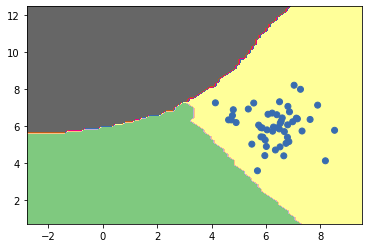

In [11]:

# Plot the points with different colors depending on the predicted class
plt.contourf(xx, yy, mesh_predictions, cmap=plt.cm.Accent)
plt.scatter(data[:,0], data[:,1], c=labels, cmap=plt.cm.Accent)
plt.show()
